In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
# drive_path = 'drive/My Drive/Colab Notebooks/data_covid/%s'

cols = ['resultado_g', 'dt_obito_o', 'houve_internacao_s',  
        'suporte_ventilatorio_s', 'sint_febre_s', 'sint_tosse_s',  
        'sint_dor_garganta_s', 'sint_dispneia_s', 
        'sint_desconforto_respiratorio_s', 'sint_saturacao_s', 
        'sint_diarreia_s', 'sint_vomito_s', 'sint_outros_s', 
        'comorb_diabetes_s', 'comorb_cardiopatia_s', 'profissional_de_saude_e']

In [92]:
df = pd.read_csv( 'datasets/cleaned_base_integracao.csv', usecols=cols )
df = df[cols]

df.drop( df[ df['resultado_g'] == 'Inconclusivo' ].index, inplace=True )
df.drop( df[ df['resultado_g'] == 'Aguardando Resultado' ].index, inplace=True )

In [93]:
df.head()

,resultado_g,dt_obito_o,houve_internacao_s,suporte_ventilatorio_s,sint_febre_s,sint_tosse_s,sint_dor_garganta_s,sint_dispneia_s,sint_desconforto_respiratorio_s,sint_saturacao_s,sint_diarreia_s,sint_vomito_s,sint_outros_s,comorb_diabetes_s,comorb_cardiopatia_s,profissional_de_saude_e
0,Não Detectável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Detectável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Não Detectável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Não Detectável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Não Detectável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df.shape

(158566, 16)

In [95]:
def get_col_groups():
  for col in df.columns:
    print( f' {col}: {df.groupby(col).groups.keys()}' )

In [96]:
get_col_groups()

 resultado_g: dict_keys(['Detectável', 'Não Detectável'])
 dt_obito_o: dict_keys(['2020-03-21 06:00:00', '2020-03-22 06:00:00', '2020-03-23 03:00:00', '2020-03-23 06:00:00', '2020-03-24 00:00:00', '2020-03-24 03:00:00', '2020-03-24 06:00:00', '2020-03-25 00:00:00', '2020-03-25 03:00:00', '2020-03-25 06:00:00', '2020-03-26 00:00:00', '2020-03-26 03:00:00', '2020-03-26 06:00:00', '2020-03-27 00:00:00', '2020-03-27 03:00:00', '2020-03-27 06:00:00', '2020-03-28 00:00:00', '2020-03-28 03:00:00', '2020-03-28 06:00:00', '2020-03-29 00:00:00', '2020-03-29 03:00:00', '2020-03-29 06:00:00', '2020-03-30 00:00:00', '2020-03-30 03:00:00', '2020-03-30 06:00:00', '2020-03-30 09:00:00', '2020-03-30 12:00:00', '2020-03-31 00:00:00', '2020-03-31 03:00:00', '2020-03-31 06:00:00', '2020-04-01 00:00:00', '2020-04-01 03:00:00', '2020-04-01 06:00:00', '2020-04-02 00:00:00', '2020-04-02 03:00:00', '2020-04-02 06:00:00', '2020-04-02 12:00:00', '2020-04-03 00:00:00', '2020-04-03 03:00:00', '2020-04-03 06:00:00'

In [97]:
def null_per_col():
  for col in df.columns:
    print( f'{col} has {df[col].isnull().sum()} null val' )

In [98]:
null_per_col()

resultado_g has 0 null val
dt_obito_o has 151000 null val
houve_internacao_s has 139530 null val
suporte_ventilatorio_s has 141679 null val
sint_febre_s has 141794 null val
sint_tosse_s has 141523 null val
sint_dor_garganta_s has 146716 null val
sint_dispneia_s has 141386 null val
sint_desconforto_respiratorio_s has 143905 null val
sint_saturacao_s has 144238 null val
sint_diarreia_s has 147013 null val
sint_vomito_s has 147275 null val
sint_outros_s has 146382 null val
comorb_diabetes_s has 150301 null val
comorb_cardiopatia_s has 150051 null val
profissional_de_saude_e has 55973 null val


In [99]:
sm = {
    '0': 0,
    'Não Detectável': 0,
    'Não se aplica': 0,
    'Ignorado': 0, 
    'Idade Gestacional Ignorada': 0,
    'Não': 0,
    'Sim': 1, 
    'Sim Invasivo': 1, 
    'Sim Não Invasivo': 1, 
    '1o Trimestre': 1, 
    '2o Trimestre': 1, 
    '3o Trimestre': 1,
    'Detectável': 1
  }

In [100]:
df[:] = df[:].replace(sm)

In [101]:
df.fillna(0, inplace=True)

In [102]:
df

,resultado_g,dt_obito_o,houve_internacao_s,suporte_ventilatorio_s,sint_febre_s,sint_tosse_s,sint_dor_garganta_s,sint_dispneia_s,sint_desconforto_respiratorio_s,sint_saturacao_s,sint_diarreia_s,sint_vomito_s,sint_outros_s,comorb_diabetes_s,comorb_cardiopatia_s,profissional_de_saude_e
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162462,0,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162463,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
162464,0,0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162465,0,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
get_col_groups()

 resultado_g: dict_keys([0, 1])
 dt_obito_o: dict_keys([0, '2020-03-21 06:00:00', '2020-03-22 06:00:00', '2020-03-23 03:00:00', '2020-03-23 06:00:00', '2020-03-24 00:00:00', '2020-03-24 03:00:00', '2020-03-24 06:00:00', '2020-03-25 00:00:00', '2020-03-25 03:00:00', '2020-03-25 06:00:00', '2020-03-26 00:00:00', '2020-03-26 03:00:00', '2020-03-26 06:00:00', '2020-03-27 00:00:00', '2020-03-27 03:00:00', '2020-03-27 06:00:00', '2020-03-28 00:00:00', '2020-03-28 03:00:00', '2020-03-28 06:00:00', '2020-03-29 00:00:00', '2020-03-29 03:00:00', '2020-03-29 06:00:00', '2020-03-30 00:00:00', '2020-03-30 03:00:00', '2020-03-30 06:00:00', '2020-03-30 09:00:00', '2020-03-30 12:00:00', '2020-03-31 00:00:00', '2020-03-31 03:00:00', '2020-03-31 06:00:00', '2020-04-01 00:00:00', '2020-04-01 03:00:00', '2020-04-01 06:00:00', '2020-04-02 00:00:00', '2020-04-02 03:00:00', '2020-04-02 06:00:00', '2020-04-02 12:00:00', '2020-04-03 00:00:00', '2020-04-03 03:00:00', '2020-04-03 06:00:00', '2020-04-03 09:00:00'

In [104]:
mask = df['dt_obito_o'] != 0
df.loc[mask, 'dt_obito_o'] = 1

In [105]:
get_col_groups()

 resultado_g: dict_keys([0, 1])
 dt_obito_o: dict_keys([0, 1])
 houve_internacao_s: dict_keys([0.0, 1.0])
 suporte_ventilatorio_s: dict_keys([0.0, 1.0])
 sint_febre_s: dict_keys([0.0, 1.0])
 sint_tosse_s: dict_keys([0.0, 1.0])
 sint_dor_garganta_s: dict_keys([0.0, 1.0])
 sint_dispneia_s: dict_keys([0.0, 1.0])
 sint_desconforto_respiratorio_s: dict_keys([0.0, 1.0])
 sint_saturacao_s: dict_keys([0.0, 1.0])
 sint_diarreia_s: dict_keys([0.0, 1.0])
 sint_vomito_s: dict_keys([0.0, 1.0])
 sint_outros_s: dict_keys([0.0, 1.0])
 comorb_diabetes_s: dict_keys([0.0, 1.0])
 comorb_cardiopatia_s: dict_keys([0.0, 1.0])
 profissional_de_saude_e: dict_keys([0.0, 1.0])


# Treinando


In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [215]:
sc = StandardScaler()
le = LabelEncoder()

## Prever resultado do exame baseado nos sintomas

### Variáveis:
- X = sintomas
- y = resultado do exame 

In [251]:
X = df.iloc[:, 4:13].values
y = df.iloc[:, 0].values

In [252]:
y = le.fit_transform(y)
print(y)

[0 1 0 ... 0 0 1]


In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [254]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### K-NN

In [255]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [256]:
y_pred = classifier.predict(X_test)

In [257]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [258]:
accuracy_score(y_test, y_pred)

0.7114523554266254

[[21276   900]
 [ 8251  1287]]


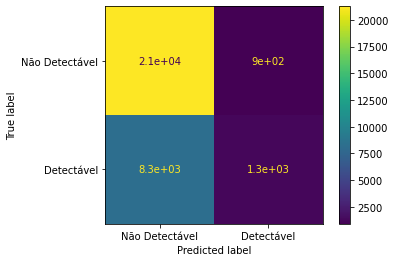

In [259]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm, ['Não Detectável', 'Detectável']).plot()

### Random Frest

In [260]:
classifier = RandomForestClassifier(n_estimators=200, class_weight='balanced_subsample', verbose=1)
classifier.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   13.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=1, warm_start=False)

In [261]:
y_pred = classifier.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished


In [262]:
accuracy_score(y_test, y_pred)

0.7147316642492275

[[20563  1613]
 [ 7434  2104]]


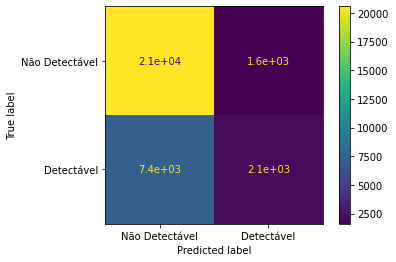

In [263]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm, ['Não Detectável', 'Detectável']).plot()

## 

## Prever se o paciente foi a obito a partir das demais informações

In [264]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [265]:
y = le.fit_transform(y)

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [267]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### K-NN

In [268]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [269]:
y_pred = classifier.predict(X_test)

In [270]:
accuracy_score(y_test, y_pred)

0.9519770448382417

[[29992   214]
 [ 1309   199]]


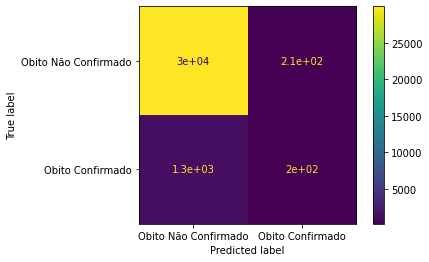

In [271]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm, ['Obito Não Confirmado', 'Obito Confirmado']).plot()

### Random Forest

In [276]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [277]:
y_pred = classifier.predict(X_test)

In [278]:
accuracy_score(y_test, y_pred)

0.9517247903134263

[[29865   341]
 [ 1190   318]]


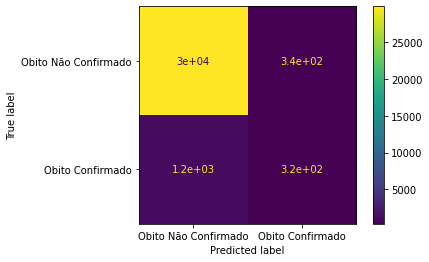

In [279]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm, ['Obito Não Confirmado', 'Obito Confirmado']).plot()